In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv


In [2]:
import warnings
import matplotlib.pyplot as plt
%matplotlib inline 
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
#load the dataset
dataset=pd.read_csv('/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv')

In [4]:
dataset.shape # number of rows and columns

(426880, 28)

In [5]:
dataset.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [6]:
dataset.tail()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
426875,303849,7307070484,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,5100,2009.0,NaN,saab 9-7x,fair,...,SUV,grey,https://images.craigslist.org/00b0b_dsIhheG86S...,For sale: 2009 Saab 9-7x Fair condition AWD ...,NaN,oh,39.937000,-82.031500,2021-04-15 00:00:00+00:00,2021-04-21 00:00:00+00:00
426876,303706,7314635557,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,7500,2011.0,ford,f-450,good,...,bus,red,https://images.craigslist.org/00b0b_8lBfNkZ6pr...,"2011 E-Ford 450 with 177k miles, 6.8 liter v-1...",NaN,oh,39.927400,-82.004100,2021-04-30 00:00:00+00:00,2021-05-15 00:00:00+00:00
426877,303704,7314710341,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,25000,2016.0,chevrolet,silverado,excellent,...,truck,blue,https://images.craigslist.org/00k0k_jw0Pda6LTk...,2013 Silverado excellent condition. Blue in co...,NaN,oh,39.896865,-82.042283,2021-04-30 00:00:00+00:00,2021-05-12 00:00:00+00:00
426878,303670,7316225330,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,6,1986.0,NaN,camaro iroc z28,good,...,NaN,red,https://images.craigslist.org/00Y0Y_avlrYDn7OY...,"1986 Iroc Z28 , T-tops , 86,500 miles , has ne...",NaN,oh,39.938630,-82.006760,2021-05-03 00:00:00+00:00,2021-05-08 00:00:00+00:00
426879,303836,7308192431,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,9795,1999.0,dodge,durango,like new,...,SUV,silver,https://images.craigslist.org/00J0J_fbgDQsCgfB...,"FOR SALE LIKE NEW 1999 DODGE DURANGO, LOADED W...",NaN,oh,39.998337,-82.022885,2021-04-17 00:00:00+00:00,2021-05-09 00:00:00+00:00


In [7]:
dataset.loc[0,'posting_date']


'2021-04-16 00:00:00+00:00'

In [8]:
#the dataframe has been transformed to datetime
type(dataset)

pandas.core.frame.DataFrame

In [9]:
type(dataset)

pandas.core.frame.DataFrame

In [10]:
dataset.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long', 'posting_date', 'removal_date'],
      dtype='object')

In [11]:
#columns to drop
columns_drop=['Unnamed:0','url','region_url','VIN','image_url','removal_date','lat','long']
#dropping only the columns existing in the dataframe
columns_existing=[i for i in columns_drop if i in dataset.columns]
#dropping the columns
dataset=dataset.drop(columns=columns_existing)


dataset.columns


Index(['Unnamed: 0', 'id', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'description',
       'county', 'state', 'posting_date'],
      dtype='object')

In [12]:
dataset.dtypes

Unnamed: 0        int64
id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
description      object
county          float64
state            object
posting_date     object
dtype: object

In [13]:
#checking missing values
dataset.isnull().sum()

Unnamed: 0           0
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
description         70
county          426880
state                0
posting_date        68
dtype: int64

In [14]:
import pandas as pd

def missing_values_handling(dataset):
    # Handling numerical data
    numeric_data = ['year', 'odometer']
    dataset[numeric_data] = dataset[numeric_data].fillna(dataset[numeric_data].median())

    # Handling categorical data
    categorical_data = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'description', 'county', 'posting_date']
    for column in categorical_data:
        dataset[column] = dataset[column].fillna('Unknown')  # Replace with 'Unknown' or another appropriate value

    return dataset

# Example usage
dataset = pd.DataFrame(dataset)  # Replace with your dataset
dataset = missing_values_handling(dataset)


In [15]:
#The dataset has no null values
dataset.isnull().sum()

Unnamed: 0      0
id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
description     0
county          0
state           0
posting_date    0
dtype: int64

In [16]:
dataset.describe()

,Unnamed: 0,id,price,year,odometer
count,426880.000000,4.268800e+05,4.268800e+05,426880.000000,4.268800e+05
mean,213439.500000,7.311487e+09,7.519903e+04,2011.240173,9.791454e+04
std,123229.785793,4.473170e+06,1.218228e+07,9.439234,2.127801e+05
min,0.000000,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,106719.750000,7.308143e+09,5.900000e+03,2008.000000,3.813000e+04
50%,213439.500000,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,320159.250000,7.315254e+09,2.648575e+04,2017.000000,1.330000e+05
max,426879.000000,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


<Axes: >

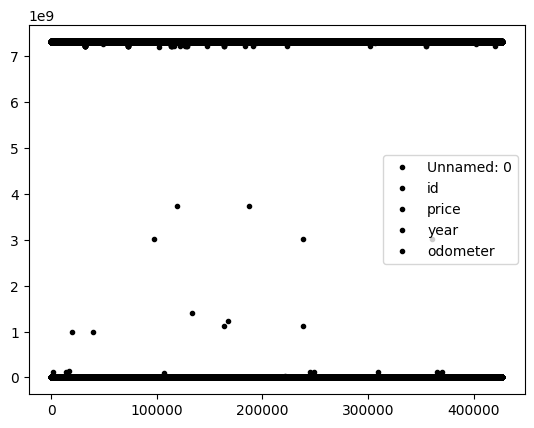

In [17]:
#plotting the dataset
dataset.plot(style='k.')

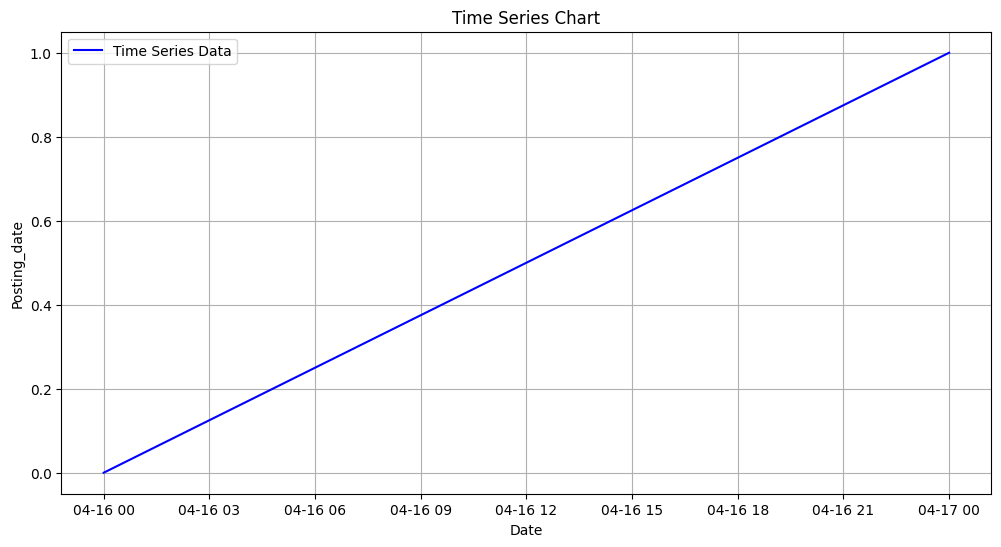

In [18]:




# Sample data (you can replace this with your own time series data)
dataset = pd.date_range(start='2021-04-16', end='2021-04-17', freq='D')
data = [i for i in range(len(dataset))]

# Create a DataFrame
df = pd.DataFrame(data, index=dataset, columns=['Posting_date'])

# Create a time series chart
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Posting_date'], label='Time Series Data', color='b')
plt.title('Time Series Chart')
plt.xlabel('Date')
plt.ylabel('Posting_date')
plt.legend()
plt.grid(True)
plt.show()

